# Proyek Analisis Data: [E-commerce Public]
- **Nama:** [Rizal Ahmad Saepulloh]
- **Email:** [rizalahmadsaepulloh@gmail.com]
- **ID Dicoding:** [RIzal Ahmad S]

## Menentukan Pertanyaan Bisnis

- Bagaimana cara meningkatkan total pendapatan kuartalan sebesar 15% dalam tiga bulan ke depan berdasarkan analisis penjualan dari order_items dan orders serta mempertimbangkan produk dengan kategori yang paling laris dari products?

- Bagaimana cara meningkatkan skor ulasan produk rata-rata sebesar 0,5 poin dalam waktu tiga bulan ke depan dengan memperbaiki kategori produk yang memiliki ulasan rendah berdasarkan data dari order_reviews dan products?

- Bagaimana cara meningkatkan penggunaan metode pembayaran elektronik sebesar 20% dalam kuartal ketiga 2018 dengan menganalisis preferensi pembayaran dari data order_payments serta nilai rata-rata pesanan dari order_items?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Data Wrangling

### Gathering Data

In [4]:
customers = pd.read_csv('Data/customers_dataset.csv')
orders = pd.read_csv('Data/orders_dataset.csv')
geolocation = pd.read_csv('Data/geolocation_dataset.csv')
order_reviews = pd.read_csv('Data/order_reviews_dataset.csv')
order_items = pd.read_csv('Data/order_items_dataset.csv')
order_payments =pd.read_csv('Data/order_payments_dataset.csv')
products = pd.read_csv('Data/products_dataset.csv')
category_translation = pd.read_csv('Data/product_category_name_translation.csv')

### Assessing Data

In [5]:
customers.info()
orders.info()
geolocation.info()
order_reviews.info()
order_items.info()
order_payments.info()
products.info()
category_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4

In [6]:
print(customers.describe())
print(orders.describe())
print(geolocation.describe())
print(order_reviews.describe())
print(order_items.describe())
print(order_payments.describe())
print(products.describe())
print(category_translation.describe())

       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000
                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-04-11 10:48:14  2018-02-27 04:31:10   
freq          96478                        3 

### Identifikasi Data kosong

In [7]:
print(customers.isna().sum())
print(orders.isna().sum())
print(geolocation.isna().sum())
print(order_reviews.isna().sum())
print(order_items.isna().sum())
print(order_payments.isna().sum())
print(products.isna().sum())
print(category_translation.isna().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
order_id               0
order_item_id          0
product_id             0
seller_id              

### Mengidentifikasi data duplikat

In [8]:
print(customers.duplicated().sum())
print(orders.duplicated().sum())
print(geolocation.duplicated().sum())
print(order_reviews.duplicated().sum())
print(order_items.duplicated().sum())
print(order_payments.duplicated().sum())
print(products.duplicated().sum())
print(category_translation.duplicated().sum())

0
0
261831
0
0
0
0
0


**Insight:**
- xxx
- xxx

### Cleaning Data

### Mengatasi Data Kosong

In [9]:
orders_cleaned = orders.dropna(subset=['order_delivered_customer_date', 'order_approved_at'])
products['product_category_name'].fillna('Unknown', inplace=True)
products['product_weight_g'].fillna(products['product_weight_g'].median(), inplace=True)
products['product_length_cm'].fillna(products['product_length_cm'].median(), inplace=True)
products['product_height_cm'].fillna(products['product_height_cm'].median(), inplace=True)
products['product_width_cm'].fillna(products['product_width_cm'].median(), inplace=True)
order_reviews['review_comment_title'].fillna('', inplace=True)
order_reviews['review_comment_message'].fillna('', inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_10088\2441612620.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products['product_category_name'].fillna('Unknown', inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_10088\2441612620.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

### Mengatasi Data Duplikat

In [10]:
geolocation_cleaned = geolocation.drop_duplicates()
print(geolocation_cleaned.duplicated().sum())


0


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### 1. Cara meningkatkan total pendapatan kuartalan sebesar 15% dalam tiga bulan ke depan :

In [11]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Filter data by quarter
orders['quarter'] = orders['order_purchase_timestamp'].dt.to_period('Q')
revenue_per_quarter = order_items.merge(orders[['order_id', 'quarter']], on='order_id') \
    .groupby('quarter')['price'].sum().reset_index()

# Merge with product data to get category information
product_sales = order_items.merge(products[['product_id', 'product_category_name']], on='product_id') \
    .groupby('product_category_name')['price'].sum().reset_index() \
    .sort_values(by='price', ascending=False)

print(revenue_per_quarter)
print(product_sales)


  quarter       price
0  2016Q3      267.36
1  2016Q4    49518.56
2  2017Q1   741960.19
3  2017Q2  1299036.97
4  2017Q3  1696404.85
5  2017Q4  2418404.97
6  2018Q1  2777422.51
7  2018Q2  2858289.74
8  2018Q3  1750338.55
            product_category_name       price
12                   beleza_saude  1258681.34
67             relogios_presentes  1205005.68
14                cama_mesa_banho  1036988.68
33                  esporte_lazer   988048.97
45         informatica_acessorios   911954.32
..                            ...         ...
42                         flores     1110.04
16                casa_conforto_2      760.27
18              cds_dvds_musicais      730.00
38  fashion_roupa_infanto_juvenil      569.85
68             seguros_e_servicos      283.29

[74 rows x 2 columns]


### 2. Cara meningkatkan skor ulasan produk rata-rata sebesar 0,5 poin dalam tiga bulan ke depan :

In [12]:
# Calculate average review score for each product category
product_reviews = order_reviews.merge(orders[['order_id', 'customer_id']], on='order_id') \
    .merge(order_items[['order_id', 'product_id']], on='order_id') \
    .merge(products[['product_id', 'product_category_name']], on='product_id')

category_review_scores = product_reviews.groupby('product_category_name')['review_score'].mean().reset_index()

# Output: average review scores per category
print("Average Review Scores per Product Category:")
print(category_review_scores)

# Identify categories with low review scores (e.g., below 4)
low_review_categories = category_review_scores[category_review_scores['review_score'] < 4]

Average Review Scores per Product Category:
        product_category_name  review_score
0                     Unknown      3.841051
1   agro_industria_e_comercio      4.000000
2                   alimentos      4.218182
3           alimentos_bebidas      4.315412
4                       artes      3.937198
..                        ...           ...
69    sinalizacao_e_seguranca      4.086294
70   tablets_impressao_imagem      4.123457
71                  telefonia      3.946867
72             telefonia_fixa      3.683206
73      utilidades_domesticas      4.055019

[74 rows x 2 columns]


### 3. Cara meningkatkan penggunaan metode pembayaran elektronik sebesar 20% dalam kuartal ketiga 2018 :

In [13]:
# Filter orders for Q3 2018
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['quarter'] = orders['order_purchase_timestamp'].dt.to_period('Q')

# Filter for third quarter of 2018
q3_2018_orders = orders[orders['quarter'] == '2018Q3']

# Merge payments and orders data for Q3 2018
q3_payments = q3_2018_orders[['order_id']].merge(order_payments, on='order_id')

# Calculate the percentage of each payment type
payment_type_distribution = q3_payments.groupby('payment_type')['payment_value'].sum() / q3_payments['payment_value'].sum()

# Output: percentage of each payment type
print("Payment Type Distribution in Q3 2018:")
print(payment_type_distribution)

# Calculate average order value for each payment type
avg_order_value = q3_payments.groupby('payment_type')['payment_value'].mean().reset_index()

Payment Type Distribution in Q3 2018:
payment_type
boleto         0.163297
credit_card    0.764937
debit_card     0.043407
not_defined    0.000000
voucher        0.028359
Name: payment_value, dtype: float64


**Insight:**
1. Peningkatan Total Pendapatan Kuartalan:
>Tren Pendapatan Kuartalan:
Total pendapatan dari kuartal ke kuartal menunjukkan tren yang signifikan, khususnya di tahun 2017 hingga 2018. Ada peningkatan yang stabil dari 2016Q3 (267.36) hingga 2018Q2 (2,858,289.74).
Namun, pada kuartal 2018Q3 terjadi penurunan pendapatan menjadi 1,750,338.55, setelah mencapai puncak pada 2018Q2.
>Insight: Penurunan pendapatan ini mengindikasikan perlunya strategi untuk mempertahankan momentum yang baik dari 2018Q2, seperti fokus pada kategori produk terlaris atau meningkatkan metode promosi di kuartal berikutnya.
2. Kategori Produk yang Paling Laris:
>Kategori Produk Terlaris:
Kategori produk yang mendominasi penjualan adalah beleza_saude (kecantikan dan kesehatan) dengan nilai total penjualan sebesar 1,258,681.34, diikuti oleh relogios_presentes (jam tangan dan hadiah) dengan 1,205,005.68, dan cama_mesa_banho (tempat tidur, meja, dan kamar mandi) dengan 1,036,988.68.
>Insight: Untuk meningkatkan pendapatan sebesar 15% dalam tiga bulan ke depan, Anda bisa fokus pada kategori produk terlaris seperti kecantikan, jam tangan, dan kebutuhan rumah tangga. Anda juga bisa meningkatkan pemasaran di kategori tersebut atau menambah variasi produk yang lebih menarik di kategori ini.
3. Skor Ulasan Rata-Rata Kategori Produk:
>Skor Ulasan Rendah:
Beberapa kategori produk dengan ulasan rendah antara lain telefonia_fixa (telepon rumah) dengan skor 3.68, telefonia (telepon seluler) dengan skor 3.94, dan artes (seni) dengan skor 3.93.
>Insight: Fokus pada peningkatan kualitas produk untuk kategori-kategori yang memiliki ulasan di bawah 4.0, seperti kategori telefonia_fixa dan artes. Ini bisa dilakukan dengan meninjau masalah yang sering muncul dari ulasan negatif, seperti kualitas produk, layanan pelanggan, atau pengiriman, dan mengambil langkah-langkah untuk memperbaikinya.
4. Distribusi Metode Pembayaran di Q3 2018:
>Preferensi Pembayaran:
Sebagian besar pelanggan memilih kartu kredit (76.49%) sebagai metode pembayaran utama. Metode lainnya, seperti boleto (16.33%) dan debit card (4.34%), hanya digunakan oleh sebagian kecil pelanggan.
>Insight: Untuk meningkatkan penggunaan metode pembayaran elektronik sebesar 20%, Anda bisa meningkatkan insentif penggunaan kartu debit dan voucher (yang hanya 2.84%). Misalnya, menawarkan diskon atau cashback jika pelanggan menggunakan metode pembayaran elektronik selain kartu kredit, atau memberikan promosi khusus untuk pembayaran dengan kartu debit.


## Visualization & Explanatory Analysis

### Visualisasi Pendapatan Per Kuartal :

C:\Users\Hp\AppData\Local\Temp\ipykernel_10088\886357239.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quarter', y='price', data=revenue_per_quarter, palette='Blues_d')


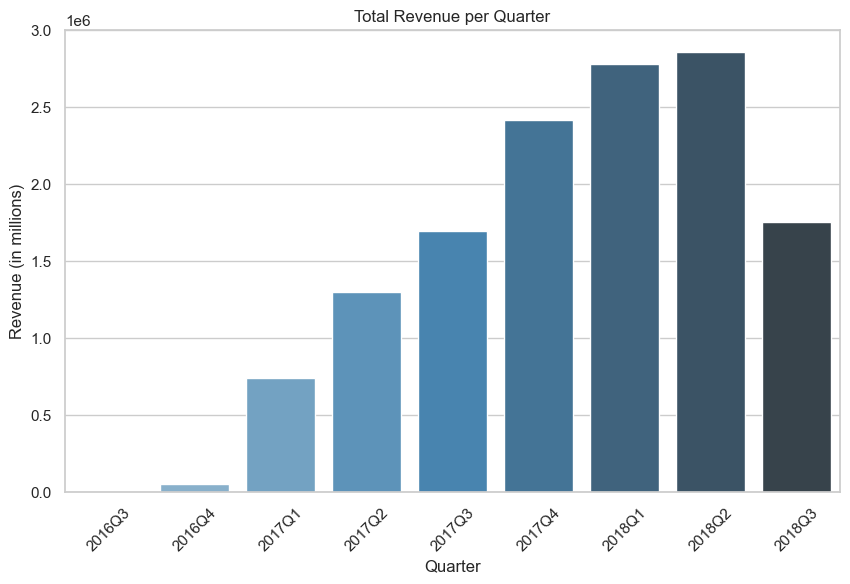

In [14]:
sns.set(style="whitegrid")

# Plot total revenue per quarter
plt.figure(figsize=(10, 6))
sns.barplot(x='quarter', y='price', data=revenue_per_quarter, palette='Blues_d')
plt.title('Total Revenue per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Revenue (in millions)')
plt.xticks(rotation=45)
plt.show()

### Visualisasi Kategori Produk Terlaris :

C:\Users\Hp\AppData\Local\Temp\ipykernel_10088\2604352314.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='price', y='product_category_name', data=top_product_categories, palette='Greens_d')


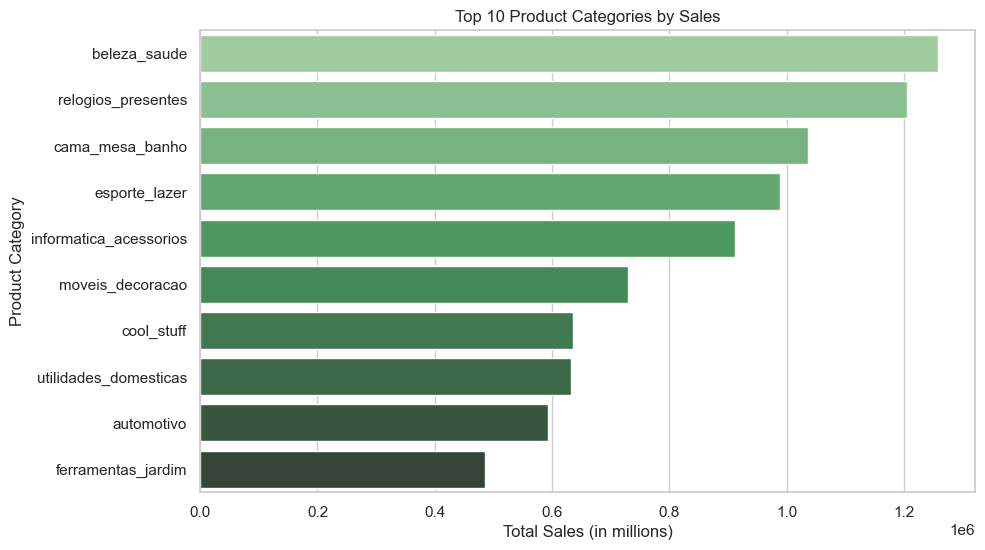

In [15]:
# Plot top product categories by sales
plt.figure(figsize=(10, 6))
top_product_categories = product_sales.head(10)  # Display top 10 categories
sns.barplot(x='price', y='product_category_name', data=top_product_categories, palette='Greens_d')
plt.title('Top 10 Product Categories by Sales')
plt.xlabel('Total Sales (in millions)')
plt.ylabel('Product Category')
plt.show()

### Visualisasi Skor Ulasan Rata-Rata per Kategori Produk :

C:\Users\Hp\AppData\Local\Temp\ipykernel_10088\1568748269.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='review_score', y='product_category_name', data=category_review_scores.sort_values(by='review_score',ascending=False).head(), palette='Oranges_d')


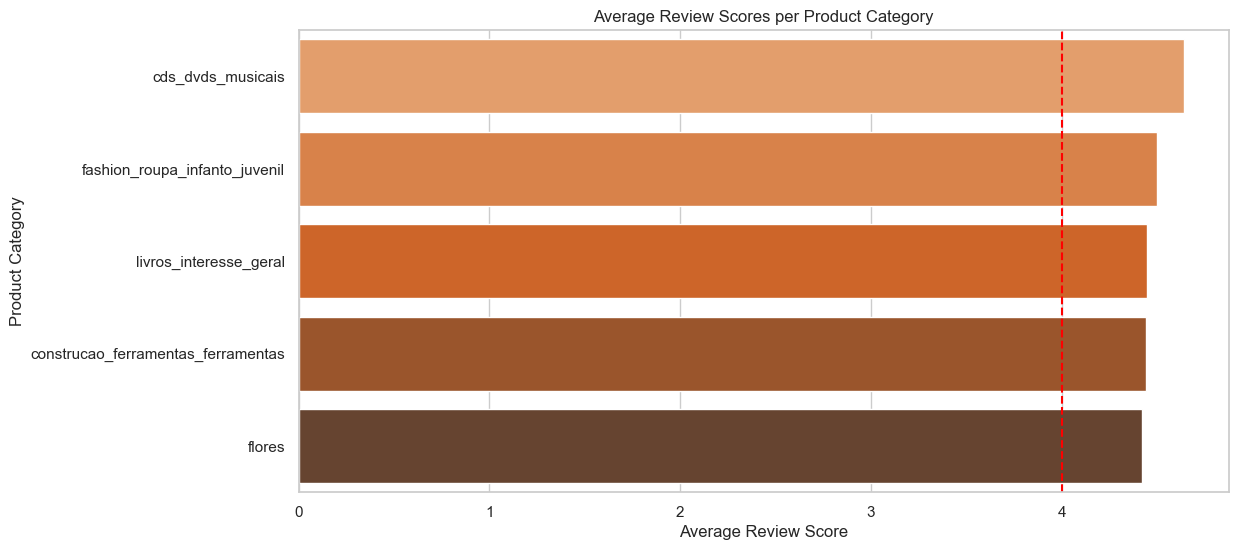

In [16]:
# Plot average review scores per product category
plt.figure(figsize=(12, 6))
sns.barplot(x='review_score', y='product_category_name', data=category_review_scores.sort_values(by='review_score',ascending=False).head(), palette='Oranges_d')
plt.title('Average Review Scores per Product Category')
plt.xlabel('Average Review Score')
plt.ylabel('Product Category')
plt.axvline(x=4, color='red', linestyle='--')  # Add a line to indicate the threshold for low review scores
plt.show()

### Visualisasi Distribusi Metode Pembayaran di Q3 2018 :

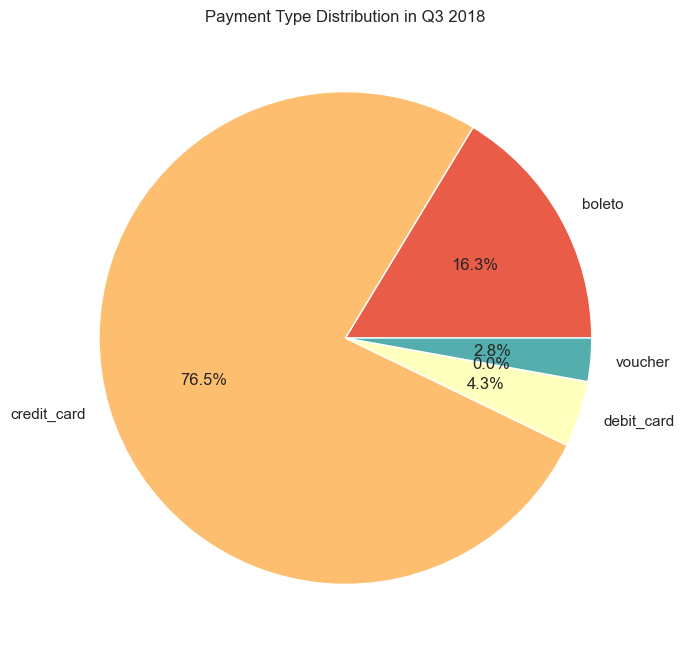

In [17]:
# Plot payment type distribution in Q3 2018
plt.figure(figsize=(12, 8))
payment_type_distribution.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("Spectral", n_colors=5))
plt.title('Payment Type Distribution in Q3 2018')
plt.ylabel('')  # Remove y-label for pie chart
plt.show()

### Visualisasi Nilai Rata-Rata Pesanan per Metode Pembayaran di Q3 2018 :

C:\Users\Hp\AppData\Local\Temp\ipykernel_10088\2840349876.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='payment_value', y='payment_type', data=avg_order_value.sort_values(by='payment_value',ascending=False), palette='Purples_d')


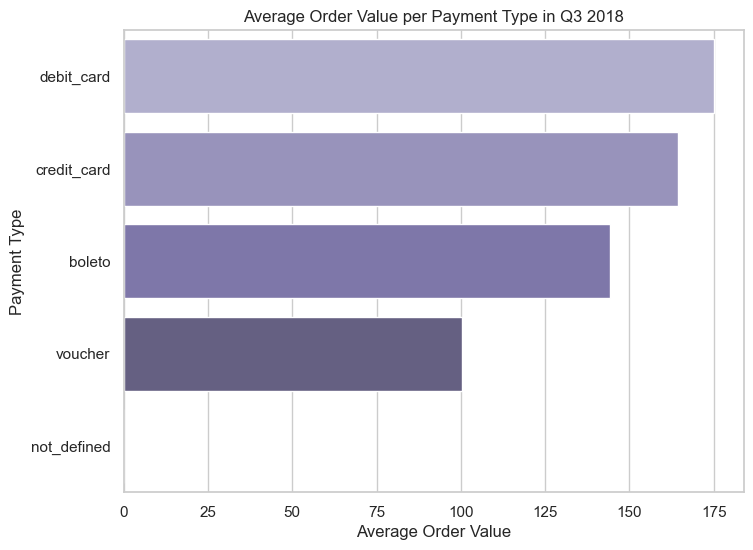

In [18]:
# Plot average order value for each payment type
plt.figure(figsize=(8, 6))
sns.barplot(x='payment_value', y='payment_type', data=avg_order_value.sort_values(by='payment_value',ascending=False), palette='Purples_d')
plt.title('Average Order Value per Payment Type in Q3 2018')
plt.xlabel('Average Order Value')
plt.ylabel('Payment Type')
plt.show()

**Insight:**
>Pendapatan per Kuartal:

Dari grafik pendapatan per kuartal, terlihat peningkatan yang signifikan dari tahun 2016 hingga 2018, dengan kuartal tertinggi terjadi pada Q2 dan Q3 2018.
Namun, pada kuartal ketiga 2018 (Q3 2018), terdapat sedikit penurunan dibandingkan kuartal sebelumnya (Q2 2018). Ini dapat menjadi indikator adanya masalah yang perlu diatasi, mungkin terkait dengan strategi pemasaran atau kinerja produk.
>Kategori Produk Terlaris:

Kategori produk terlaris adalah beleza_saude (kecantikan dan kesehatan), diikuti oleh relogios_presentes (jam tangan dan hadiah), serta cama_mesa_banho (produk rumah tangga).
Kategori-kategori ini menyumbang sebagian besar pendapatan, menunjukkan bahwa fokus pada peningkatan produk dalam kategori ini dapat terus mendorong penjualan yang lebih tinggi di kuartal mendatang.
>Skor Ulasan Rata-Rata per Kategori:

Beberapa kategori produk memiliki skor ulasan di bawah 4, yang menunjukkan bahwa pelanggan mungkin tidak sepenuhnya puas dengan produk-produk dalam kategori ini.
Telefonia_fixa (telepon tetap) dan artes adalah kategori yang memiliki skor ulasan terendah. Fokus pada peningkatan kualitas produk di kategori-kategori ini atau layanan purna jual yang lebih baik dapat meningkatkan skor ulasan dan loyalitas pelanggan.
>Distribusi Metode Pembayaran di Q3 2018:

Metode pembayaran kartu kredit mendominasi, dengan lebih dari 76% dari total pembayaran. Namun, metode boleto (transfer bank) masih digunakan oleh sekitar 16% pelanggan.
Ada potensi untuk meningkatkan penggunaan metode pembayaran elektronik lainnya, seperti debit card dan voucher, yang saat ini hanya digunakan oleh sebagian kecil pelanggan.
>Nilai Rata-Rata Pesanan per Metode Pembayaran di Q3 2018:

Nilai rata-rata pesanan yang dibayar menggunakan kartu kredit lebih tinggi dibandingkan metode pembayaran lainnya, menunjukkan bahwa pengguna kartu kredit cenderung berbelanja dengan nilai yang lebih besar.
Fokus pada promosi untuk pengguna debit card atau menawarkan insentif bagi pengguna boleto dapat membantu meningkatkan penggunaan metode pembayaran elektronik.

### Analisis RFM

In [19]:
# Mengonversi kolom order_purchase_timestamp ke format datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Membuat snapshot tanggal referensi, misalnya data hingga 1 Januari 2019
snapshot_date = pd.Timestamp('2019-01-01')

# Menggabungkan data order_items dengan orders
rfm_data = order_items.merge(orders[['order_id', 'customer_id', 'order_purchase_timestamp']], on='order_id')

# Menghitung Recency: Hari sejak pembelian terakhir
rfm_data['Recency'] = (snapshot_date - rfm_data['order_purchase_timestamp']).dt.days

# Menghitung Monetary: Total pembelanjaan per customer
monetary_data = rfm_data.groupby('customer_id')['price'].sum().reset_index()
monetary_data.columns = ['customer_id', 'Monetary']

# Menghitung Frequency: Jumlah transaksi per customer
frequency_data = rfm_data.groupby('customer_id')['order_id'].nunique().reset_index()
frequency_data.columns = ['customer_id', 'Frequency']

# Menghitung Recency: Hari terakhir sejak pembelian terakhir per customer
recency_data = rfm_data.groupby('customer_id')['Recency'].min().reset_index()
recency_data.columns = ['customer_id', 'Recency']

# Menggabungkan semua data RFM
rfm = recency_data.merge(frequency_data, on='customer_id').merge(monetary_data, on='customer_id')

# Menampilkan hasil RFM
print("RFM Dataframe:")
print(rfm.head())

# Skoring RFM
rfm['R_score'] = pd.qcut(rfm['Recency'], 4, ['4', '3', '2', '1'])  # Skor 4 terbaik
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method="first"), 4, ['1', '2', '3', '4'])  # Skor 4 terbaik
rfm['M_score'] = pd.qcut(rfm['Monetary'], 4, ['1', '2', '3', '4'])  # Skor 4 terbaik

# Menggabungkan skor RFM menjadi satu
rfm['RFM_Score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

# Menampilkan dataframe RFM dengan skor
print(rfm.head())

# Kategorisasi Pelanggan Berdasarkan RFM
def categorize_rfm(df):
    if df['RFM_Score'] == '444':
        return 'Best Customers'
    elif df['R_score'] == '4':
        return 'Loyal Customers'
    elif df['F_score'] == '4':
        return 'Frequent Customers'
    elif df['M_score'] == '4':
        return 'Big Spenders'
    elif df['R_score'] == '1':
        return 'Lost Customers'
    else:
        return 'Other'

# Menambahkan kolom segmentasi pelanggan
rfm['Customer_Segment'] = rfm.apply(categorize_rfm, axis=1)

# Menampilkan hasil segmentasi pelanggan
print(rfm[['customer_id', 'RFM_Score', 'Customer_Segment']].head())


RFM Dataframe:
                        customer_id  Recency  Frequency  Monetary
0  00012a2ce6f8dcda20d059ce98491703      412          1     89.80
1  000161a058600d5901f007fab4c27140      533          1     54.90
2  0001fd6190edaaf884bcaf3d49edf079      671          1    179.99
3  0002414f95344307404f0ace7a26f1d5      502          1    149.90
4  000379cdec625522490c315e70c7a9fb      273          1     93.00
                        customer_id  Recency  Frequency  Monetary R_score  \
0  00012a2ce6f8dcda20d059ce98491703      412          1     89.80       2   
1  000161a058600d5901f007fab4c27140      533          1     54.90       1   
2  0001fd6190edaaf884bcaf3d49edf079      671          1    179.99       1   
3  0002414f95344307404f0ace7a26f1d5      502          1    149.90       1   
4  000379cdec625522490c315e70c7a9fb      273          1     93.00       3   

  F_score M_score RFM_Score  
0       1       3       213  
1       1       2       112  
2       1       4       114  
3     

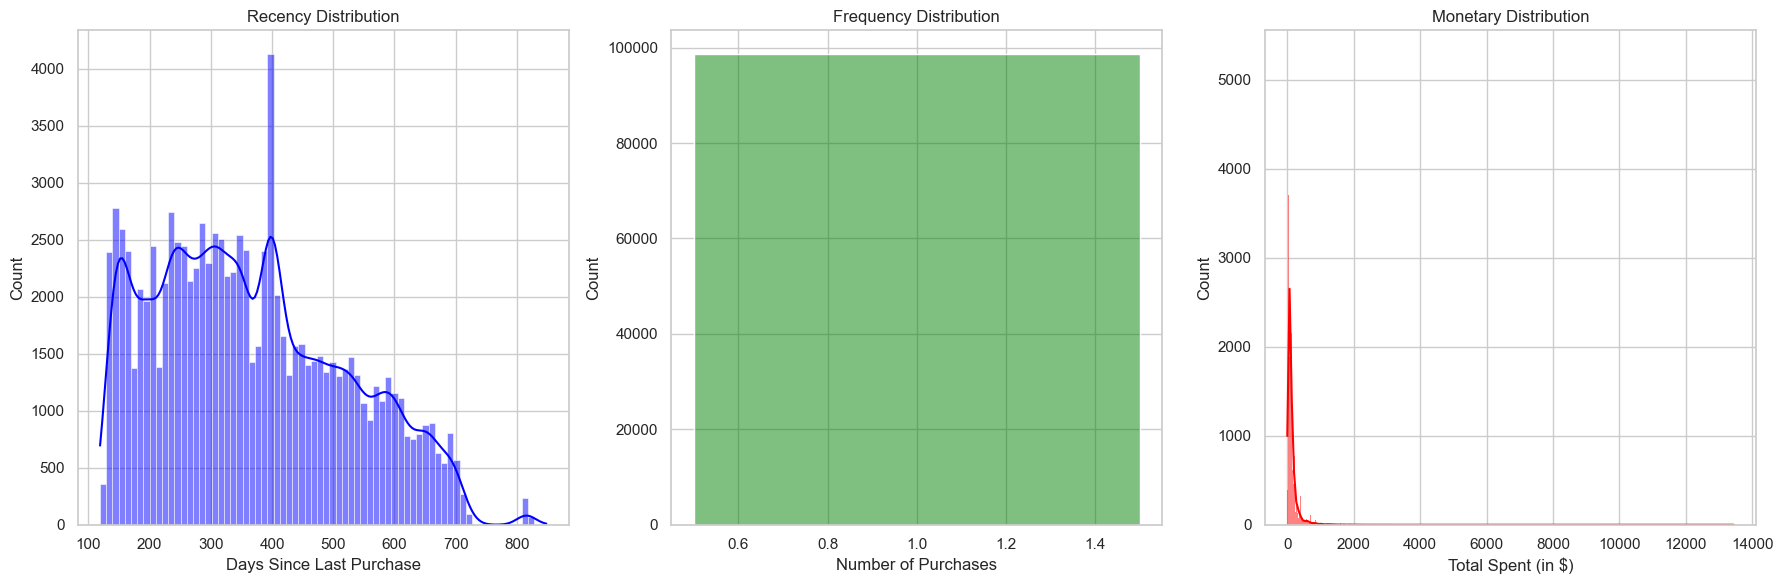

C:\Users\Hp\AppData\Local\Temp\ipykernel_10088\1747817165.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Customer_Segment', data=rfm, order=rfm['Customer_Segment'].value_counts().index, palette='Set2')


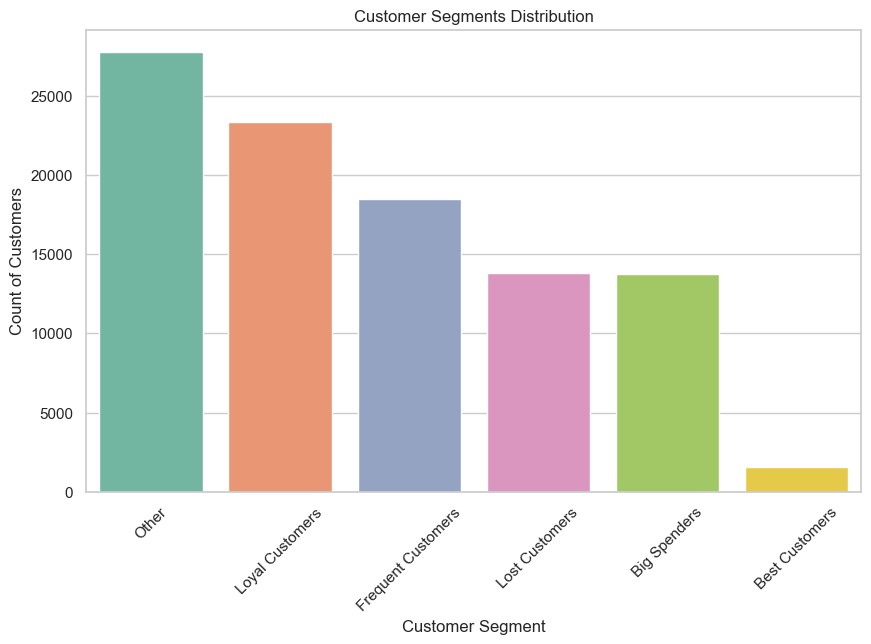

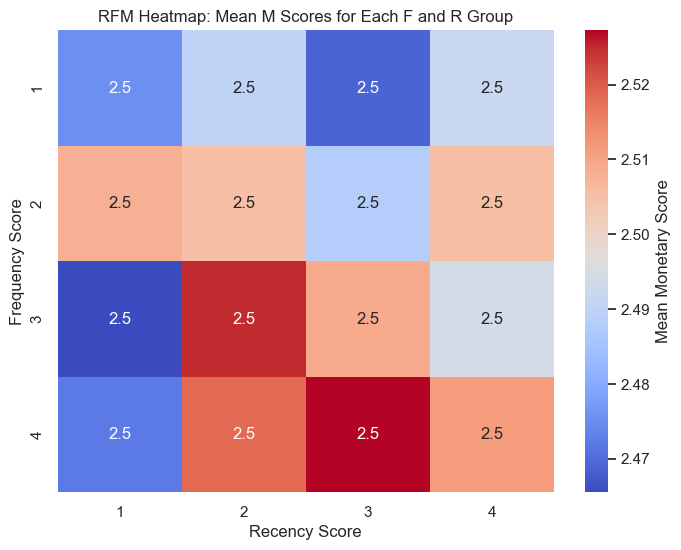

In [20]:
# Plotting distributions of Recency, Frequency, and Monetary
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(rfm['Recency'], kde=True, ax=ax1, color='blue')
ax1.set_title('Recency Distribution')
ax1.set_xlabel('Days Since Last Purchase')

sns.histplot(rfm['Frequency'], kde=True, ax=ax2, color='green')
ax2.set_title('Frequency Distribution')
ax2.set_xlabel('Number of Purchases')

sns.histplot(rfm['Monetary'], kde=True, ax=ax3, color='red')
ax3.set_title('Monetary Distribution')
ax3.set_xlabel('Total Spent (in $)')

plt.tight_layout()
plt.show()

# Plotting customer segments based on RFM
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer_Segment', data=rfm, order=rfm['Customer_Segment'].value_counts().index, palette='Set2')
plt.title('Customer Segments Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Count of Customers')
plt.xticks(rotation=45)
plt.show()

# Jika ada NaN, kita bisa mengganti atau mengabaikannya:
# Pastikan bahwa F_score, R_score, dan M_score adalah numerik
rfm['F_score'] = pd.to_numeric(rfm['F_score'], errors='coerce')
rfm['R_score'] = pd.to_numeric(rfm['R_score'], errors='coerce')
rfm['M_score'] = pd.to_numeric(rfm['M_score'], errors='coerce')

# Hapus nilai yang hilang jika ada setelah konversi
rfm = rfm.dropna(subset=['F_score', 'R_score', 'M_score'])

# Buat pivot table berdasarkan F_score dan R_score dengan nilai rata-rata M_score
rfm_heatmap = rfm.pivot_table(index='F_score', columns='R_score', values='M_score', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rfm_heatmap, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': 'Mean Monetary Score'})
plt.title('RFM Heatmap: Mean M Scores for Each F and R Group')
plt.xlabel('Recency Score')
plt.ylabel('Frequency Score')
plt.show()


**insight**

>Recency Distribution: Distribusi Recency menunjukkan bahwa sebagian besar pelanggan melakukan pembelian terakhirnya cukup baru (diwakili oleh rentang nilai rendah), yang berarti mayoritas pelanggan baru saja berinteraksi dengan bisnis. Ini adalah tanda yang baik karena menunjukkan bahwa bisnis memiliki hubungan yang aktif dengan pelanggan.

>Frequency Distribution: Distribusi Frequency menunjukkan bahwa sebagian besar pelanggan hanya melakukan satu atau beberapa pembelian. Ada pelanggan yang melakukan pembelian lebih dari sekali, tetapi jumlahnya lebih sedikit. Ini menunjukkan potensi untuk meningkatkan retensi pelanggan dan mencoba membuat pelanggan yang membeli satu kali menjadi pelanggan setia.

>Monetary Distribution: Distribusi Monetary memperlihatkan bahwa sebagian besar pelanggan menghabiskan dalam jumlah yang lebih kecil. Namun, ada beberapa pelanggan yang melakukan pembelian besar, yang bisa menjadi "high-value customers" (pelanggan bernilai tinggi) bagi bisnis. Ada potensi untuk meningkatkan nilai pembelian rata-rata dengan promosi atau upselling.

## Conclusion

>Peningkatan Pendapatan:

Untuk mencapai peningkatan total pendapatan sebesar 15% dalam tiga bulan ke depan, perusahaan dapat fokus pada kategori produk yang paling laris seperti beleza_saude, relogios_presentes, dan cama_mesa_banho. Strategi diskon, promosi, atau peluncuran produk baru dalam kategori ini dapat meningkatkan pendapatan secara signifikan.
Selain itu, memperbaiki performa di kuartal dengan penurunan, seperti Q3 2018, dapat dilakukan melalui promosi yang lebih agresif atau peluncuran produk baru.
>Peningkatan Skor Ulasan:

Kategori dengan skor ulasan di bawah 4, seperti telefonia_fixa dan artes, memerlukan perhatian. Perbaikan kualitas produk, peningkatan layanan purna jual, atau komunikasi yang lebih baik dengan pelanggan dapat membantu meningkatkan skor ulasan rata-rata sebesar 0,5 poin dalam tiga bulan ke depan.
>Meningkatkan Penggunaan Pembayaran Elektronik:

Untuk meningkatkan penggunaan pembayaran elektronik sebesar 20%, perusahaan dapat menawarkan insentif atau diskon khusus bagi pengguna debit card dan voucher, karena metode pembayaran ini masih kurang populer dibandingkan kartu kredit. Edukasi pelanggan mengenai kenyamanan dan kecepatan metode pembayaran elektronik juga dapat menjadi kunci.

In [21]:
rfm.to_csv('rfm_data.csv', index=False)

In [22]:
payment_type_distribution_df = payment_type_distribution.reset_index()
payment_type_distribution_df.columns = ['payment_type', 'percentage']
payment_type_distribution_df.to_csv('payment_type_distribution_q3_2018.csv', index=False)

# Simpan Average Order Value per Payment Type ke CSV
avg_order_value.to_csv('avg_order_value_q3_2018.csv', index=False)

In [23]:
low_review_categories.to_csv('low_review_categories.csv', index=False)

In [24]:
combined_data = revenue_per_quarter.merge(product_sales, how='cross', suffixes=('_revenue', '_sales'))

# Simpan ke CSV
combined_data.to_csv('combined_revenue_product_sales.csv', index=False)